# Plotting a 2 simplex with 3 strategies

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import egttools as egt

In [3]:
from egttools.plotting.simplified import plot_replicator_dynamics_in_simplex, plot_moran_dynamics_in_simplex

## First let's look at a coordination game

In [4]:
payoffs = np.array([[1, 0, 0],
                    [0, 2, 0],
                    [0, 0, 3]])

In [ ]:
type_labels = ['A', 'B', 'C']

### Infinite populations - replicator dynamics

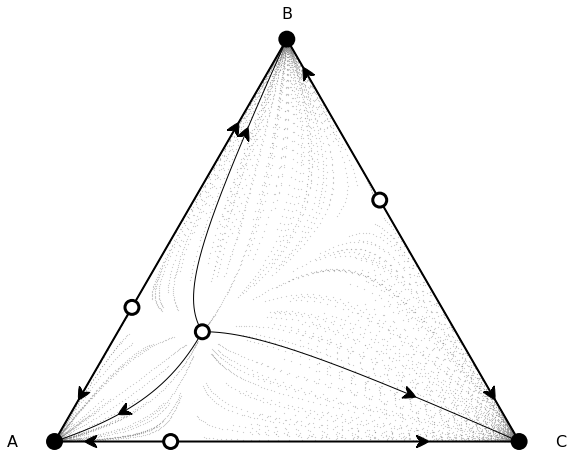

In [7]:
fig, ax = plt.subplots(figsize=(10,8))

simplex, gradients, roots, roots_xy, stability = plot_replicator_dynamics_in_simplex(payoffs, ax=ax)

plot = (simplex.draw_triangle()
#            .draw_gradients()
#            .add_colorbar()
           .add_vertex_labels(type_labels, epsilon_bottom=0.09)
           .draw_stationary_points(roots_xy, stability)
           .draw_trajectory_from_roots(lambda u, t: egt.analytical.replicator_equation(u, payoffs), 
                                       roots,
                                       stability,
                                       trajectory_length=15,
                                       linewidth=1,
                                       step=0.01,
                                       color='k', draw_arrow=True, arrowdirection='right', arrowsize=30, zorder=4, arrowstyle='fancy')
           .draw_scatter_shadow(lambda u, t: egt.analytical.replicator_equation(u, payoffs), 300, color='gray', marker='.', s=0.1)
          )

ax.axis('off')
ax.set_aspect('equal')

plt.xlim((-.05,1.05))
plt.ylim((-.02, simplex.top_corner + 0.05))
plt.show()

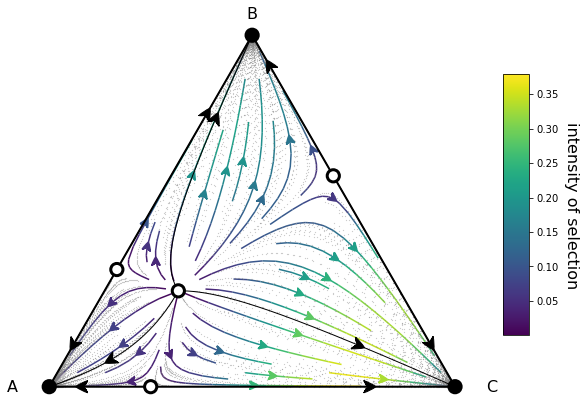

In [8]:
fig, ax = plt.subplots(figsize=(10,8))

plot = (simplex.add_axis(ax=ax)
           .draw_triangle()
           .draw_gradients(zorder=0)
           .add_colorbar()
           .add_vertex_labels(type_labels, epsilon_bottom=0.09)
           .draw_stationary_points(roots_xy, stability)
           .draw_trajectory_from_roots(lambda u, t: egt.analytical.replicator_equation(u, payoffs), 
                                       roots,
                                       stability,
                                       trajectory_length=15,
                                       linewidth=1,
                                       step=0.01,
                                       color='k', draw_arrow=True, arrowdirection='right', arrowsize=30, zorder=4, arrowstyle='fancy')
           .draw_scatter_shadow(lambda u, t: egt.analytical.replicator_equation(u, payoffs), 300, color='gray', marker='.', s=0.1, zorder=0)
          )

ax.axis('off')
ax.set_aspect('equal')

plt.xlim((-.05,1.05))
plt.ylim((-.02, simplex.top_corner + 0.05))
plt.show()

### Finite populations - Moran process

In [9]:
from egttools.utils import calculate_stationary_distribution_non_hermitian

In [10]:
Z = 100
beta = 1
mu = 1/Z

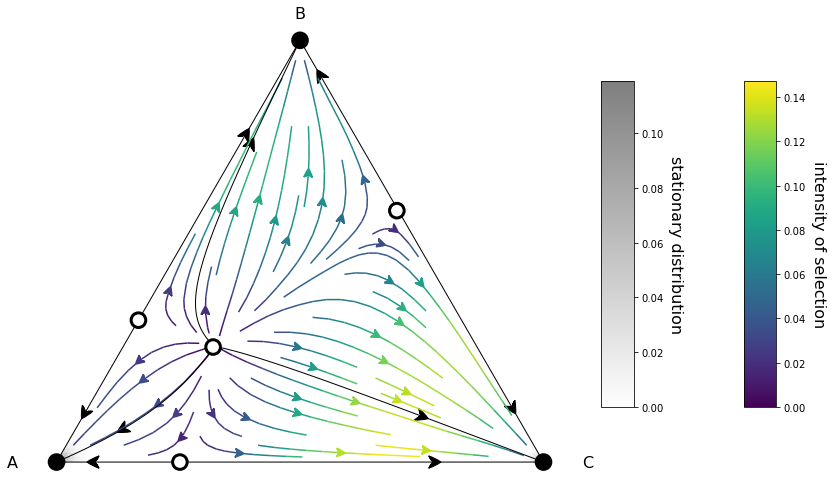

In [11]:
fig, ax = plt.subplots(figsize=(15,10))

simplex, gradients, roots, roots_xy, stability, evolver = plot_moran_dynamics_in_simplex(payoff_matrix=payoffs, population_size=Z, beta=beta, ax=ax)

evolver.mu = mu
transitions = evolver.calculate_full_transition_matrix(beta)
sd = calculate_stationary_distribution_non_hermitian(transitions.toarray())

plot = (simplex.draw_gradients(zorder=5)
           .add_colorbar()
           .draw_stationary_points(roots_xy, stability, zorder=11)
           .add_vertex_labels(type_labels, epsilon_bottom=0.09)
           .draw_stationary_distribution(sd, alpha=0.5, edgecolors='gray', cmap='binary', shading='gouraud', zorder=0)
           .draw_trajectory_from_roots(lambda u, t: Z*evolver.full_gradient_selection_without_mutation(u, beta), 
                                       roots,
                                       stability,
                                       trajectory_length=30,
                                       linewidth=1,
                                       step=0.001,
                                       color='k', draw_arrow=True, arrowdirection='right', arrowsize=30, zorder=10, arrowstyle='fancy')
#            .draw_scatter_shadow(lambda u, t: Z*evolver.full_gradient_selection(u, beta), 300, color='gray', marker='.', s=0.1)
          )

ax.axis('off')
ax.set_aspect('equal')

plt.xlim((-.05,1.05))
plt.ylim((-.02, simplex.top_corner + 0.05))
plt.show()

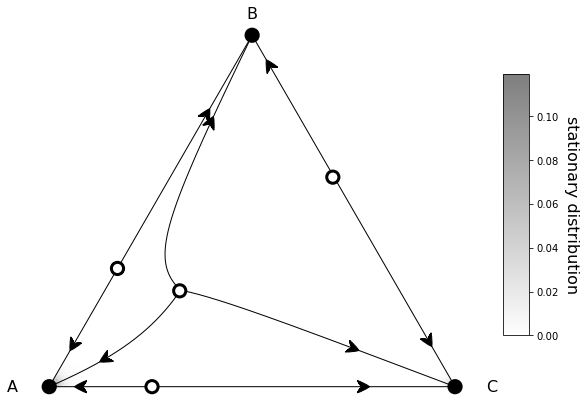

In [12]:
fig, ax = plt.subplots(figsize=(10,8))

plot = (simplex.add_axis(ax=ax)
           .draw_stationary_points(roots_xy, stability)
           .add_vertex_labels(type_labels, epsilon_bottom=0.09)
           .draw_stationary_distribution(sd, alpha=0.5, edgecolors='gray', cmap='binary', shading='gouraud')
           .draw_trajectory_from_roots(lambda u, t: Z*evolver.full_gradient_selection_without_mutation(u, beta), 
                                       roots,
                                       stability,
                                       trajectory_length=30,
                                       linewidth=1,
                                       step=0.001,
                                       color='k', draw_arrow=True, arrowdirection='right', arrowsize=30, zorder=4, arrowstyle='fancy')
#            .draw_scatter_shadow(lambda u, t: Z*evolver.full_gradient_selection(u, beta), 100, color='gray', marker='.', s=0.1)
          )

ax.axis('off')
ax.set_aspect('equal')

plt.xlim((-.05,1.05))
plt.ylim((-.02, simplex.top_corner + 0.05))
plt.show()

## Now let's look at Rock-Paper-Scisors

In [13]:
payoffs = np.array([[0, 1, -1],
                    [-1, 0, 1],
                    [1, -1, 0]])

In [14]:
type_labels = ['rock', 'scisors', 'paper']

### Infinite populations - replicator dynamics

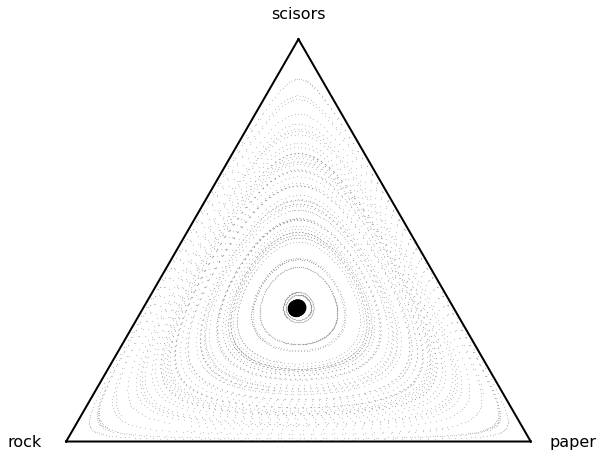

In [28]:
fig, ax = plt.subplots(figsize=(10,8))

simplex, gradients, roots, roots_xy, stability = plot_replicator_dynamics_in_simplex(payoffs, ax=ax)

plot = (simplex.draw_triangle()
#            .draw_gradients()
#            .add_colorbar()
           .add_vertex_labels(type_labels, epsilon_bottom=0.09)
           .draw_stationary_points(roots_xy, stability)
           .draw_trajectory_from_roots(lambda u, t: egt.analytical.replicator_equation(u, payoffs), 
                                       roots,
                                       stability,
                                       trajectory_length=15,
                                       linewidth=1,
                                       step=0.01,
                                       color='k', draw_arrow=True, arrowdirection='right', arrowsize=30, zorder=4, arrowstyle='fancy')
           .draw_scatter_shadow(lambda u, t: egt.analytical.replicator_equation(u, payoffs), 50, color='gray', marker='.', s=0.1)
          )

ax.axis('off')
ax.set_aspect('equal')

plt.xlim((-.05,1.05))
plt.ylim((-.02, simplex.top_corner + 0.05))
plt.show()

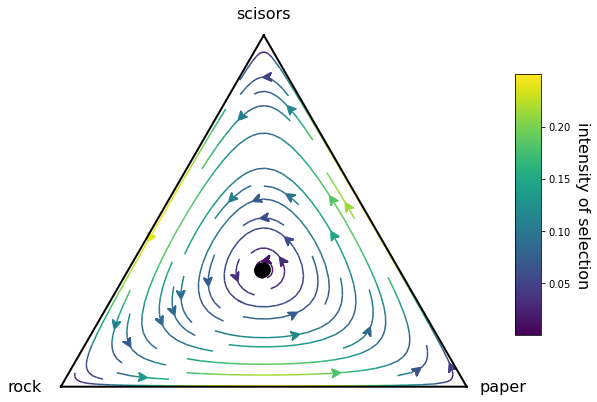

In [29]:
fig, ax = plt.subplots(figsize=(10,8))

plot = (simplex.add_axis(ax=ax)
           .draw_triangle()
           .draw_gradients(zorder=0)
           .add_colorbar()
           .add_vertex_labels(type_labels, epsilon_bottom=0.09)
           .draw_stationary_points(roots_xy, stability)
           .draw_trajectory_from_roots(lambda u, t: egt.analytical.replicator_equation(u, payoffs), 
                                       roots,
                                       stability,
                                       trajectory_length=15,
                                       linewidth=1,
                                       step=0.01,
                                       color='k', draw_arrow=True, arrowdirection='right', arrowsize=30, zorder=4, arrowstyle='fancy')
#            .draw_scatter_shadow(lambda u, t: egt.analytical.replicator_equation(u, payoffs), 300, color='gray', marker='.', s=0.1, zorder=0)
          )

ax.axis('off')
ax.set_aspect('equal')

plt.xlim((-.05,1.05))
plt.ylim((-.02, simplex.top_corner + 0.05))
plt.show()

### Finite populations - Moran process

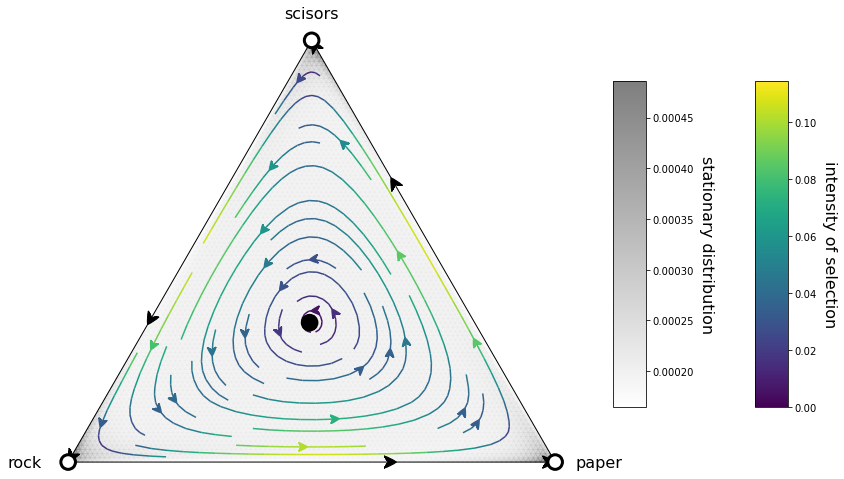

In [17]:
fig, ax = plt.subplots(figsize=(15,10))

simplex, gradients, roots, roots_xy, stability, evolver = plot_moran_dynamics_in_simplex(payoff_matrix=payoffs, population_size=Z, beta=beta, ax=ax)

evolver.mu = mu
transitions = evolver.calculate_full_transition_matrix(beta)
sd = calculate_stationary_distribution_non_hermitian(transitions.toarray())

plot = (simplex.draw_gradients(zorder=5)
           .add_colorbar()
           .draw_stationary_points(roots_xy, stability, zorder=11)
           .add_vertex_labels(type_labels, epsilon_bottom=0.09)
           .draw_stationary_distribution(sd, alpha=0.5, edgecolors='gray', cmap='binary', shading='gouraud', zorder=0)
           .draw_trajectory_from_roots(lambda u, t: Z*evolver.full_gradient_selection_without_mutation(u, beta), 
                                       roots,
                                       stability,
                                       trajectory_length=30,
                                       linewidth=1,
                                       step=0.001,
                                       color='k', draw_arrow=True, arrowdirection='right', arrowsize=30, zorder=10, arrowstyle='fancy')
#            .draw_scatter_shadow(lambda u, t: Z*evolver.full_gradient_selection(u, beta), 300, color='gray', marker='.', s=0.1)
          )

ax.axis('off')
ax.set_aspect('equal')

plt.xlim((-.05,1.05))
plt.ylim((-.02, simplex.top_corner + 0.05))
plt.show()

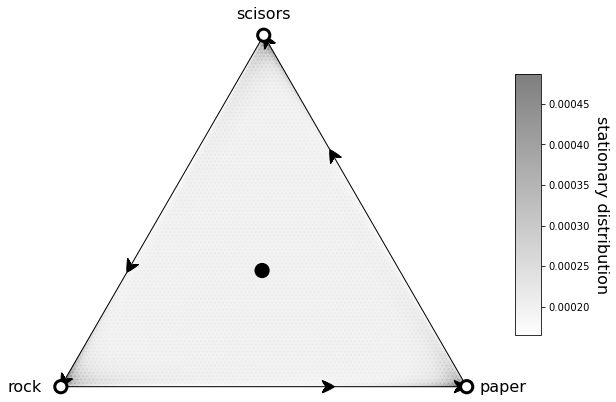

In [18]:
fig, ax = plt.subplots(figsize=(10,8))

plot = (simplex.add_axis(ax=ax)
           .draw_stationary_points(roots_xy, stability)
           .add_vertex_labels(type_labels, epsilon_bottom=0.09)
           .draw_stationary_distribution(sd, alpha=0.5, edgecolors='gray', cmap='binary', shading='gouraud')
           .draw_trajectory_from_roots(lambda u, t: Z*evolver.full_gradient_selection_without_mutation(u, beta), 
                                       roots,
                                       stability,
                                       trajectory_length=30,
                                       linewidth=1,
                                       step=0.001,
                                       color='k', draw_arrow=True, arrowdirection='right', arrowsize=30, zorder=4, arrowstyle='fancy')
#            .draw_scatter_shadow(lambda u, t: Z*evolver.full_gradient_selection(u, beta), 100, color='gray', marker='.', s=0.1)
          )

ax.axis('off')
ax.set_aspect('equal')

plt.xlim((-.05,1.05))
plt.ylim((-.02, simplex.top_corner + 0.05))
plt.show()